In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
tf.random.set_seed(42)

# Load dataset

In [15]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize images from [0,255] to [-1,1]
x_train = x_train.astype(np.float32) / 127.5 - 1.0
x_train = x_train.reshape(-1, 28*28)   # flatten to 784

# one-hot encode labels
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
latent_dim = 100
batch_size = 100
epochs = 80
lr = 0.0002
beta1 = 0.5

# Generator

In [ ]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_dim=latent_dim + 10, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(784, activation='tanh')  # output in [-1,1]
])

# Discriminator

In [ ]:
discriminator = tf.keras.Sequential([
    tf.keras.layers.Dense(400, input_dim=784+10, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
gen_optimizer = tf.keras.optimizers.Adam(lr, beta_1=beta1)
disc_optimizer = tf.keras.optimizers.Adam(lr, beta_1=beta1)

# Traning  the model

In [ ]:



disc_acc_real_history = []
disc_acc_fake_history = []
gen_loss_history = []


discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Re-running training to collect accuracy history for plotting...")

for epoch in range(epochs):
    epoch_disc_acc_real_list = []
    epoch_disc_acc_fake_list = []
    epoch_gen_loss_list = []

    for i in range(batch_size):

        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]
        labels = y_train_onehot[idx]

        real_input = np.concatenate([real_imgs, labels], axis=1)


        z = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_labels_idx = np.random.randint(0, 10, batch_size)
        fake_labels = tf.keras.utils.to_categorical(fake_labels_idx, 10)
        gen_input = np.concatenate([z, fake_labels], axis=1)


        fake_imgs = generator.predict(gen_input, verbose=0)
        fake_input = np.concatenate([fake_imgs, fake_labels], axis=1)


        disc_metrics_real = discriminator.train_on_batch(real_input, np.ones((batch_size,1)))
        disc_metrics_fake = discriminator.train_on_batch(fake_input, np.zeros((batch_size,1)))


        _, disc_acc_real = disc_metrics_real[0], disc_metrics_real[1]
        _, disc_acc_fake = disc_metrics_fake[0], disc_metrics_fake[1]


        z = np.random.normal(0, 1, (batch_size, latent_dim))
        sampled_labels_idx = np.random.randint(0, 10, batch_size)
        sampled_labels = tf.keras.utils.to_categorical(sampled_labels_idx, 10)
        gen_input_g = np.concatenate([z, sampled_labels], axis=1)

        valid_y = np.ones((batch_size,1))
        with tf.GradientTape() as tape:
            fake_imgs_g = generator(gen_input_g, training=True)
            disc_input_g = tf.concat([fake_imgs_g, sampled_labels], axis=1)
            disc_pred_g = discriminator(disc_input_g, training=False)
            gen_loss = tf.keras.losses.binary_crossentropy(valid_y, disc_pred_g)
            gen_loss = tf.reduce_mean(gen_loss)
        grads = tape.gradient(gen_loss, generator.trainable_variables)
        gen_optimizer.apply_gradients(zip(grads, generator.trainable_variables))


        epoch_disc_acc_real_list.append(disc_acc_real)
        epoch_disc_acc_fake_list.append(disc_acc_fake)
        epoch_gen_loss_list.append(gen_loss.numpy())


    disc_acc_real_history.append(np.mean(epoch_disc_acc_real_list))
    disc_acc_fake_history.append(np.mean(epoch_disc_acc_fake_list))
    gen_loss_history.append(np.mean(epoch_gen_loss_list))


    print(f"Epoch {epoch} | D real acc: {disc_acc_real_history[-1]:.4f} | D fake acc: {disc_acc_fake_history[-1]:.4f} | G loss: {gen_loss_history[-1]:.4f}")




In [ ]:
generator.save("generator_model.h5")
discriminator.save("discriminator_model.h5")

I trained in Bigred and importing the training output file here

In [9]:
with open("/content/hw4_3_training_output_7631711.txt", "r") as file:
    lines = file.readlines()  # lines is a list of strings
    lines = [line.strip() for line in lines]  # remove newline characters
print(lines)

disc_acc_real_history = []
disc_acc_fake_history = []
for i in lines[1:80]:
  print(i.split(" ") )
  #print(float(i.split(" ")[3]), float(i.split(" ")[5]))
  disc_acc_real_history.append(float(i.split(" ")[6]))
  disc_acc_fake_history.append(float(i.split(" ")[11]))

['Re-running training to collect accuracy history for plotting...', 'Epoch 0 | D real acc: 0.9362 | D fake acc: 0.9315 | G loss: 3.7312', 'Epoch 1 | D real acc: 0.9835 | D fake acc: 0.9834 | G loss: 7.7937', 'Epoch 2 | D real acc: 0.9740 | D fake acc: 0.9739 | G loss: 5.0384', 'Epoch 3 | D real acc: 0.9679 | D fake acc: 0.9678 | G loss: 4.6545', 'Epoch 4 | D real acc: 0.9616 | D fake acc: 0.9616 | G loss: 3.5855', 'Epoch 5 | D real acc: 0.9427 | D fake acc: 0.9426 | G loss: 0.8443', 'Epoch 6 | D real acc: 0.9154 | D fake acc: 0.9152 | G loss: 0.4937', 'Epoch 7 | D real acc: 0.8863 | D fake acc: 0.8861 | G loss: 0.4180', 'Epoch 8 | D real acc: 0.8605 | D fake acc: 0.8603 | G loss: 0.4340', 'Epoch 9 | D real acc: 0.8377 | D fake acc: 0.8376 | G loss: 0.4499', 'Epoch 10 | D real acc: 0.8184 | D fake acc: 0.8183 | G loss: 0.4868', 'Epoch 11 | D real acc: 0.8029 | D fake acc: 0.8028 | G loss: 0.5136', 'Epoch 12 | D real acc: 0.7885 | D fake acc: 0.7884 | G loss: 0.5412', 'Epoch 13 | D real 

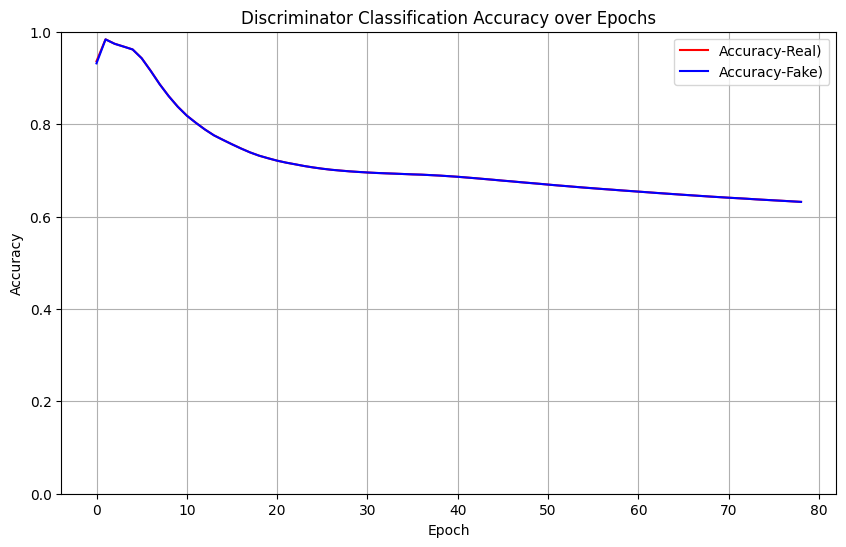

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(disc_acc_real_history)), disc_acc_real_history, label='Accuracy-Real)', color='red')
plt.plot(range(len(disc_acc_fake_history)), disc_acc_fake_history, label='Accuracy-Fake)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Discriminator Classification Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.savefig("discriminator_accuracy_plot.png")
plt.show()

# Generated Images

In [14]:
generator = tf.keras.models.load_model("/content/generator_model_3.h5")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


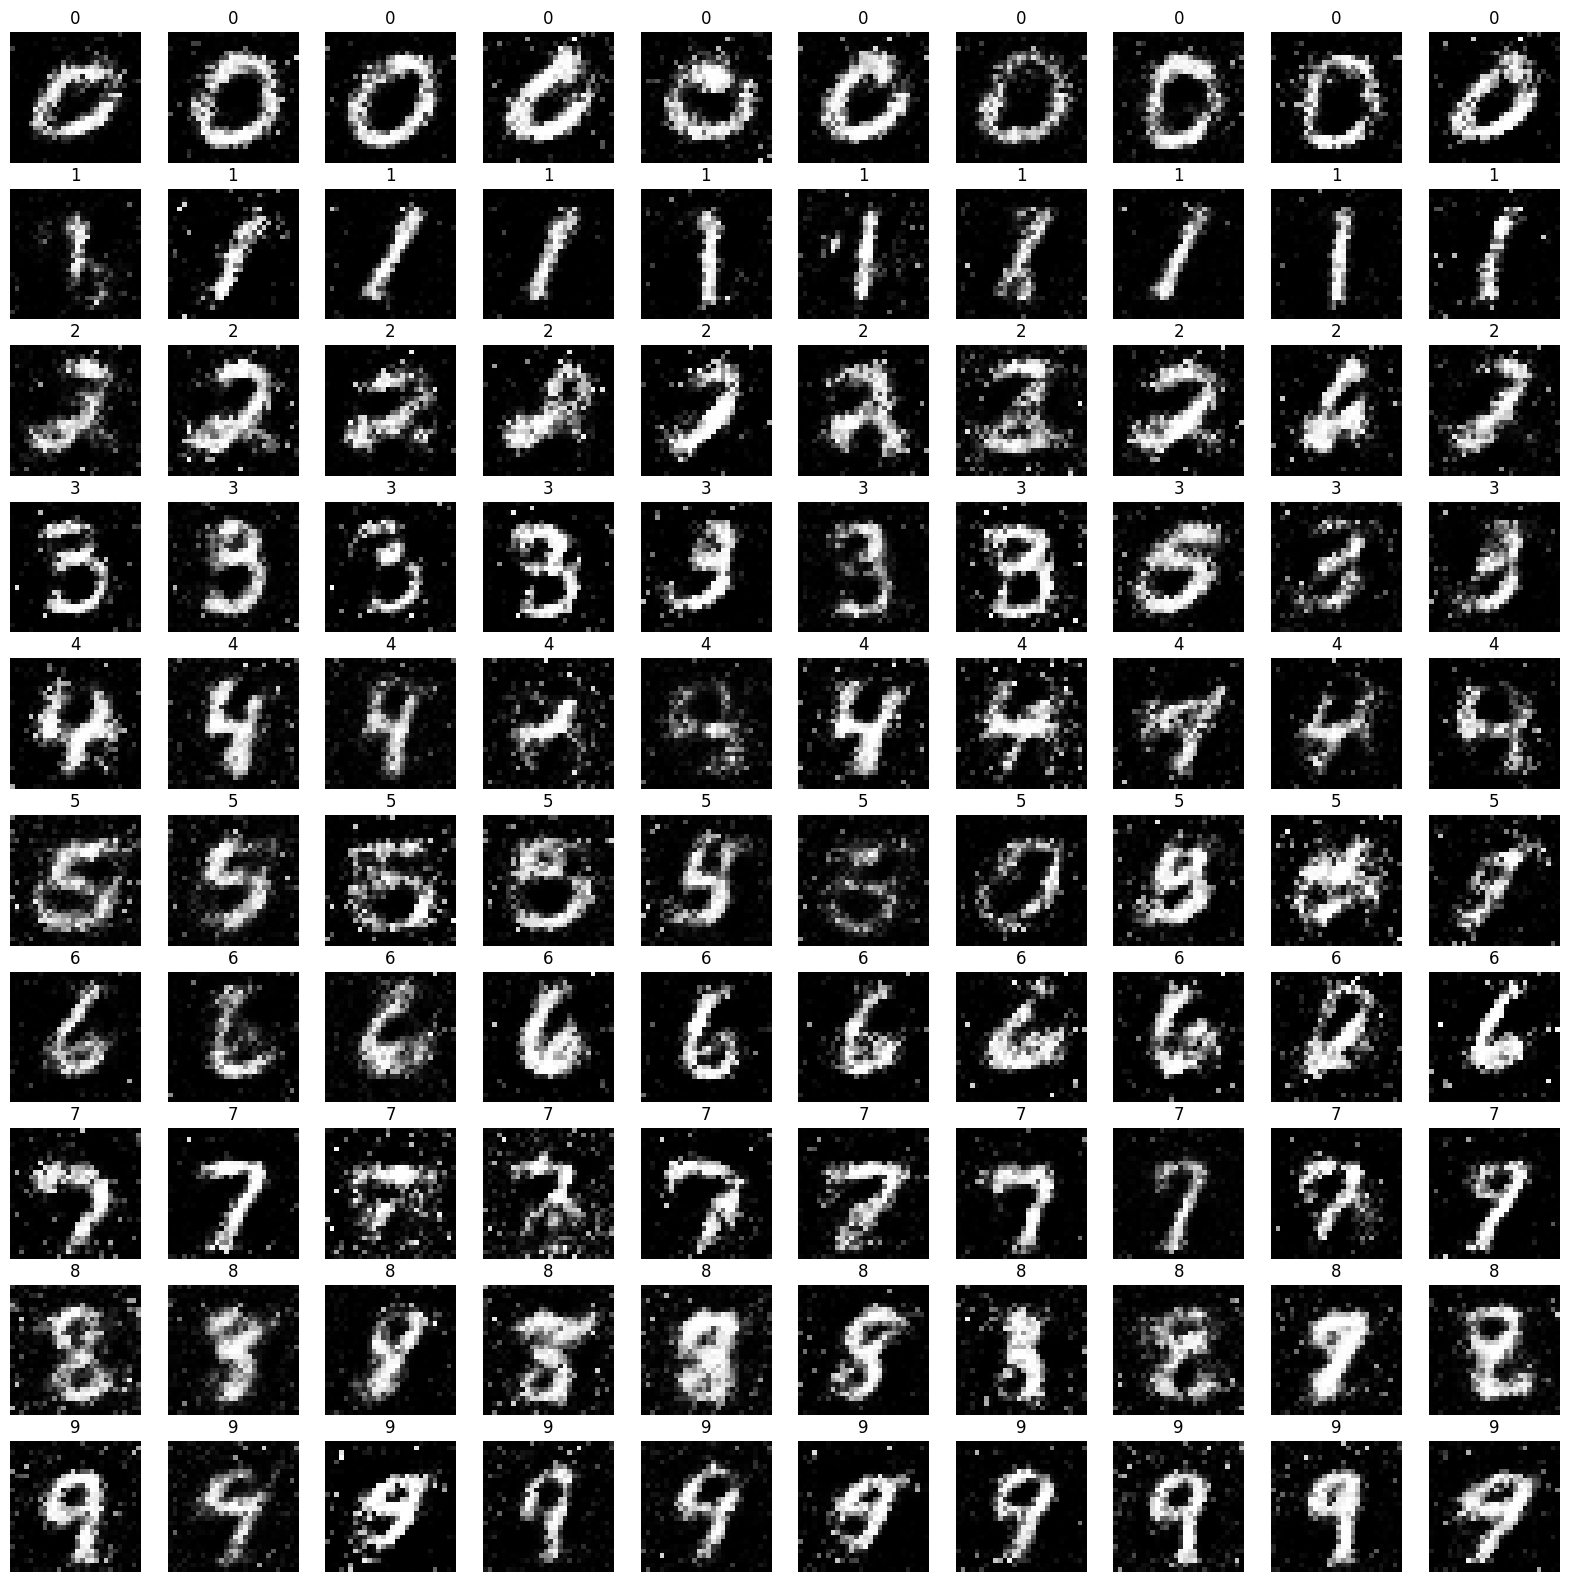

In [18]:

r, c = 10, 10
z = np.random.normal(0, 1, (r*c, latent_dim))
labels = np.repeat(np.arange(0,10), c)
labels_onehot = tf.keras.utils.to_categorical(labels, 10)

gen_input = np.concatenate([z, labels_onehot], axis=1)
gen_imgs = generator.predict(gen_input)


gen_imgs = 0.5 * gen_imgs + 0.5
gen_imgs = gen_imgs.reshape(-1,28,28)


fig, axs = plt.subplots(r, c, figsize=(20,20))
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt], cmap='gray')
        axs[i,j].set_title(f"{labels[cnt]}")
        axs[i,j].axis('off')
        cnt +=1
plt.show()

Downloading file

In [19]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DLS_HW4_3.ipynb"
files.download("/content/drive/MyDrive/Colab Notebooks/DLS_HW4_3.html")

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DLS_HW4_3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 667140 bytes to /content/drive/MyDrive/Colab Notebooks/DLS_HW4_3.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>